In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import glob

path = 'data' # use your path
all_files = glob.glob(path + "/fund_net_value_*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['fund_code'] = filename[-10:-4]
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df.head()

,Unnamed: 0,id,code,day,net_value,sum_value,factor,acc_factor,refactor_net_value,fund_code
0,0,12053666,1027,2019-07-15,0.916,0.916,1.0,1.0,0.916,001027
1,1,12041483,1027,2019-07-12,0.904,0.904,1.0,1.0,0.904,001027
2,2,12032838,1027,2019-07-11,0.901,0.901,1.0,1.0,0.901,001027
3,3,12022916,1027,2019-07-10,0.901,0.901,1.0,1.0,0.901,001027
4,4,12003127,1027,2019-07-09,0.904,0.904,1.0,1.0,0.904,001027


In [4]:
df_fund_info = pd.read_csv("data/stock_fund_info.csv", dtype={"main_code":str})
df_fund_info.head()

,Unnamed: 0,id,main_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
0,0,23,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
1,1,24,000042,中证财通可持续发展100指数,财通基金管理有限公司,上海银行股份有限公司,401001,开放式基金,402001,股票型,2013-03-22,NaN
2,2,25,000043,嘉实美国成长股票,嘉实基金管理有限公司,中国银行股份有限公司,401003,QDII,402001,股票型,2013-06-14,NaN
3,3,28,000049,中银标普全球,中银基金管理有限公司,招商银行股份有限公司,401003,QDII,402001,股票型,2013-03-19,NaN
4,4,33,270042,广发纳斯达克100指数（QDII）,广发基金管理有限公司,中国银行股份有限公司,401003,QDII,402001,股票型,2012-08-15,NaN


In [5]:
df_fund_info['operate_mode'].value_counts()

开放式基金    806
封闭式基金    302
ETF      190
QDII     144
LOF      123
Name: operate_mode, dtype: int64

In [6]:
df = pd.merge(df, df_fund_info, left_on='fund_code', right_on='main_code', how='left')

In [7]:
df.head()

,Unnamed: 0_x,id_x,code,day,net_value,sum_value,factor,acc_factor,refactor_net_value,fund_code,...,main_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
0,0,12053666,1027,2019-07-15,0.916,0.916,1.0,1.0,0.916,001027,...,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN
1,1,12041483,1027,2019-07-12,0.904,0.904,1.0,1.0,0.904,001027,...,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN
2,2,12032838,1027,2019-07-11,0.901,0.901,1.0,1.0,0.901,001027,...,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN
3,3,12022916,1027,2019-07-10,0.901,0.901,1.0,1.0,0.901,001027,...,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN
4,4,12003127,1027,2019-07-09,0.904,0.904,1.0,1.0,0.904,001027,...,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN


In [8]:
df.columns

Index(['Unnamed: 0_x', 'id_x', 'code', 'day', 'net_value', 'sum_value',
       'factor', 'acc_factor', 'refactor_net_value', 'fund_code',
       'Unnamed: 0_y', 'id_y', 'main_code', 'name', 'advisor', 'trustee',
       'operate_mode_id', 'operate_mode', 'underlying_asset_type_id',
       'underlying_asset_type', 'start_date', 'end_date'],
      dtype='object')

In [9]:
df.drop(columns=['Unnamed: 0_x', 'id_x', 'Unnamed: 0_y', 'id_y', 'main_code'], inplace=True)

In [10]:
df.head()

,code,day,net_value,sum_value,factor,acc_factor,refactor_net_value,fund_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
0,1027,2019-07-15,0.916,0.916,1.0,1.0,0.916,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN
1,1027,2019-07-12,0.904,0.904,1.0,1.0,0.904,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN
2,1027,2019-07-11,0.901,0.901,1.0,1.0,0.901,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN
3,1027,2019-07-10,0.901,0.901,1.0,1.0,0.901,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN
4,1027,2019-07-09,0.904,0.904,1.0,1.0,0.904,001027,前海中证大农业,前海开源基金管理有限公司,北京银行股份有限公司,401001,开放式基金,402001,股票型,2015-02-13,NaN


In [11]:
df['day'] = pd.to_datetime(df['day'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393456 entries, 0 to 1393455
Data columns (total 17 columns):
code                        1393456 non-null object
day                         1393456 non-null datetime64[ns]
net_value                   1393456 non-null float64
sum_value                   1312884 non-null float64
factor                      1393456 non-null float64
acc_factor                  1393456 non-null float64
refactor_net_value          1393456 non-null float64
fund_code                   1393456 non-null object
name                        1393456 non-null object
advisor                     1393456 non-null object
trustee                     1393456 non-null object
operate_mode_id             1393456 non-null int64
operate_mode                1393456 non-null object
underlying_asset_type_id    1393456 non-null int64
underlying_asset_type       1393456 non-null object
start_date                  1393456 non-null object
end_date                    0 non-null float

- sum_value并不是都有的！所以没有的情况下要用net_value代替。

# 设置起止日期等全局变量

In [13]:
start_date = '20160101'
end_date = '20190710'

# 使用xirr

In [14]:
'''xirr计算函数'''
import datetime
from scipy import optimize
 
'''solution 1'''
# def xnpv(rate, cashflows):
#     return sum([cf/(1+rate)**((t-cashflows[0][0]).days/365.0) for (t,cf) in cashflows])
 
# def xirr(cashflows, guess=0.1):
#     try:
#         return optimize.newton(lambda r: xnpv(r,cashflows),guess)
#     except:
#         print('Calc Wrong')

'''solution 2'''
from datetime import date
def xirr(cashflows):
    years = [(ta[0] - cashflows[0][0]).days / 365. for ta in cashflows]
    residual = 1.0
    step = 0.05
    guess = 0.05
    epsilon = 0.0001
    limit = 10000
    while abs(residual) > epsilon and limit > 0:
        limit -= 1
        residual = 0.0
        for i, trans in enumerate(cashflows):
            residual += trans[1] / pow(guess, years[i])
        if abs(residual) > epsilon:
            if residual > 0:
                guess += step
            else:
                guess -= step
                step /= 2.0
    return guess - 1

# 测试
data = [(datetime.date(2006, 1, 24), -39967), 
        (datetime.date(2008, 2, 6), -19866), 
        (datetime.date(2010, 10, 18), 245706), 
        (datetime.date(2013, 9, 14), 52142)]
xirr(data)

0.42369774132967053

In [15]:
'''每期必投的傻瓜策略'''
# 单位净值有可能高于累计净值，因为折算的关系，就是share的数量变少了，价格变贵，为了追踪指数什么的
def strategy_1(df_internal, start_date, end_date):
    if df_partial['sum_value'].isna().any():
        value_type = 'net_value'
    else:
        value_type = 'sum_value'
    if df_internal['day'].min() > pd.to_datetime(start_date):
        start_date = df_internal['day'].min()
    if df_internal['day'].max() < pd.to_datetime(end_date):
        end_date = df_internal['day'].max()
    buy_dates = pd.date_range(start=start_date, end=end_date, freq='5B')
    invested = 0
    shares = 0
    investment_records = []
    for date in buy_dates:
        count = 0
        deposit_price = df_internal[df_internal['day']==date][value_type]
        while deposit_price.empty and count <= 5:  # 如果是春节或者国庆的节假日，延后算这笔投资
            date += 1
            deposit_price = df_internal[df_internal['day']==date][value_type]
            count += 1
        if count <= 5 and deposit_price.values[0] != 0:
            investment_records.append((date, -100))
            shares += 100 / deposit_price.values[0]
    
    withdraw_price = df_internal[df_internal['day']==end_date][value_type]
    if not withdraw_price.empty and withdraw_price.values[0] != 0:
        investment_records.append((pd.to_datetime(end_date), shares * withdraw_price.values[0]))
        invested = -sum([money for (date, money) in investment_records[:-1]])
        returned = sum([money for (date, money) in investment_records if money > 0])
        return pd.Series({"invested":invested, "returned":returned, "return":xirr(investment_records)})
    else:
        return None

In [16]:
'''first just test few groups'''
all_fund_codes = df['fund_code'].drop_duplicates()
first_10_fund_codes = all_fund_codes[:10]
df_partial = df[df['fund_code'].isin(list(first_10_fund_codes) + ['968049'])]
returns = df_partial.groupby('fund_code').apply(strategy_1, start_date, end_date)
returns

,invested,returned,return
fund_code,,,
000311,18400.0,20085.089782,0.050103
001027,18400.0,21594.024217,0.092313
003624,14100.0,12142.841005,-0.108054
040047,18400.0,24610.384052,0.170399
150240,2800.0,3319.985163,0.846244
150254,2900.0,3420.522428,0.785286
150268,18400.0,23152.787862,0.133621
163113,18400.0,16688.210636,-0.054638
240014,18400.0,22867.722576,0.126228


In [17]:
'''run through all funds'''
returns_1 = df.groupby('fund_code').apply(strategy_1, start_date, end_date)

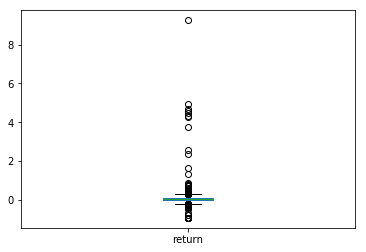

In [22]:
returns_1['return'].plot('box')

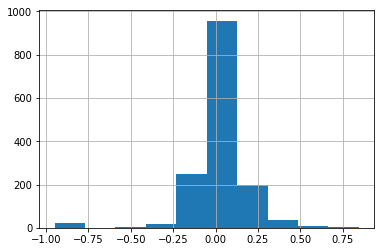

In [25]:
returns_1[returns_1['return'] <= 1]['return'].hist()

In [31]:
pd.cut(returns_1[(returns_1['return'] <= 0.3) & (returns_1['return'] >= -0.3)]['return'], 10).value_counts()

(-0.0541, 0.00478]    355
(0.00478, 0.0636]     344
(0.0636, 0.122]       252
(-0.113, -0.0541]     161
(0.122, 0.181]        118
(0.181, 0.24]          61
(-0.172, -0.113]       58
(0.24, 0.299]          32
(-0.231, -0.172]       20
(-0.29, -0.231]        14
Name: return, dtype: int64

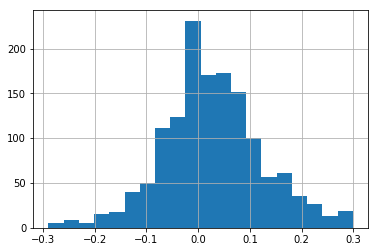

In [34]:
returns_1[(returns_1['return'] <= 0.3) & (returns_1['return'] >= -0.3)]['return'].hist(bins=20)

In [35]:
sum((returns_1['return'] <= 0.3) & (returns_1['return'] >= -0.3)) / len(returns_1)

0.9248366013071896

In [38]:
returns_1[(returns_1['return'] <= 0.3) & (returns_1['return'] >= -0.3)]['return'].std()

0.09613664117737908

In [18]:
'''一个简单的策略，在历史价格区间的下50%就买入，高于70%就卖出，陆续卖出吧，每次卖出价值100元的份额'''
def strategy_2(df_internal, start_date, end_date):
    if df_partial['sum_value'].isna().any():
        value_type = 'net_value'
    else:
        value_type = 'sum_value'
    df_internal = df_internal.sort_values(by='day', ascending=True)
    if df_internal['day'].min() > pd.to_datetime(start_date):
        start_date = df_internal['day'].min()
    if df_internal['day'].max() < pd.to_datetime(end_date):
        end_date = df_internal['day'].max()
    buy_dates = pd.date_range(start=start_date, end=end_date, freq='5B')
    invested = 0
    shares = 0
    investment_records = []
    for date in buy_dates:
        count = 0
        curr_price = df_internal[df_internal['day']==date][value_type]
        while curr_price.empty and count <= 5:  # 如果是春节或者国庆的节假日，延后算这笔投资
            date += 1
            curr_price = df_internal[df_internal['day']==date][value_type]
            count += 1
        if count <= 5 and curr_price.values[0] != 0:
            curr_idx = df_internal[df_internal['day']==date].index[0]
            curr_price = curr_price.values[0]
            buy_price = df_internal.iloc[0:curr_idx, :][value_type].quantile(0.5)
            sell_price = df_internal.iloc[0:curr_idx, :][value_type].quantile(0.7)
            investment_records.append((date, -100))
            shares += 100 / curr_price
            if curr_price < buy_price:
                investment_records.append((date, -100))
                shares += 100 / curr_price
            elif curr_price > sell_price:
                if shares > 100 / curr_price:
                    investment_records.append((date, 100))
                    shares -= 100 / curr_price
                
    withdraw_price = df_internal[df_internal['day']==end_date][value_type]
    if not withdraw_price.empty and withdraw_price.values[0] != 0:
        investment_records.append((pd.to_datetime(end_date), shares * withdraw_price.values[0]))
        invested = -sum([money for (date, money) in investment_records[:-1]])
        returned = sum([money for (date, money) in investment_records if money > 0])
        return pd.Series({"invested":invested, "returned":returned, "return":xirr(investment_records)})
    else:
        return None

In [19]:
returns_2 = df.groupby('fund_code').apply(strategy_2, start_date, end_date)

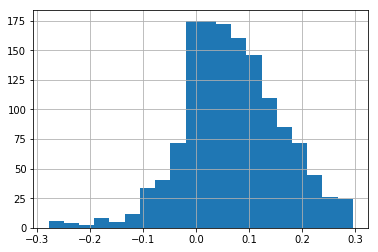

In [49]:
returns_2[(returns_2['return'] <= 0.3) & (returns_2['return'] >= -0.3)]['return'].hist(bins=20)

In [52]:
returns_2[(returns_2['return'] <= 0.3) & (returns_2['return'] >= -0.3)]['return'].std()

0.0926056624156188

In [46]:
return_comparison = pd.merge(returns_1, returns_2, on='fund_code')

In [47]:
return_comparison

,invested_x,returned_x,return_x,invested_y,returned_y,return_y
fund_code,,,,,,
000041,18400.0,20739.055326,0.068708,12400.0,28222.505921,0.105422
000042,18400.0,18004.500121,-0.012266,17700.0,25825.975182,0.024055
000043,18400.0,23938.170528,0.153640,11700.0,27019.565422,0.156266
000044,18400.0,23128.971261,0.133006,13300.0,28691.735246,0.141468
000049,18400.0,20748.810004,0.068970,17200.0,29488.966576,0.088749
000055,18400.0,24735.336251,0.173485,18900.0,36093.781280,0.181391
000059,18400.0,15448.545466,-0.096966,26000.0,29067.509188,-0.048441
000082,18400.0,16029.743425,-0.076807,23000.0,25225.830222,-0.044108
000176,18400.0,21268.351548,0.083397,22000.0,33162.131918,0.101895


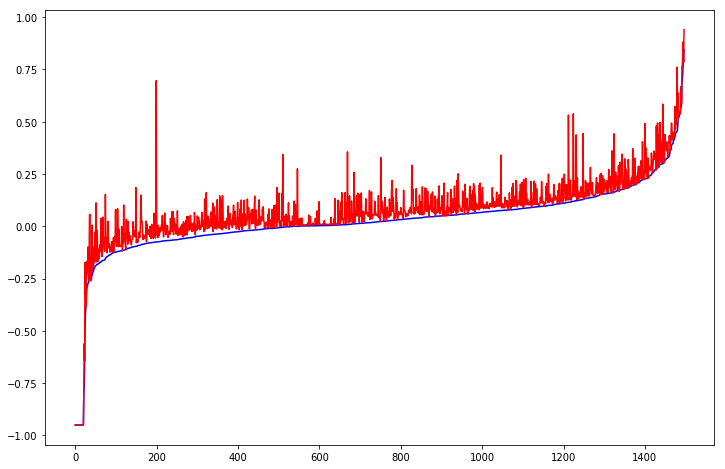

In [48]:
return_comparison.sort_values('return_x', inplace=True)
data = return_comparison[return_comparison < 1]
plt.figure(figsize=(12, 8))
plt.plot(range(len(data)), data['return_x'], 'b', range(len(data)), data['return_y'], 'r')

In [42]:
return_comparison.to_csv(start_date + ' to ' + end_date + '.csv')

In [43]:
sum((return_comparison['return_x'] < 0).values)

2

In [44]:
return_comparison

,invested_x,returned_x,return_x,invested_y,returned_y,return_y
fund_code,,,,,,
003624,14100.0,12142.841005,-0.108054,17000.0,20145.812034,-0.057118
163113,18400.0,16688.210636,-0.054638,23600.0,27167.714851,-0.016971
000311,18400.0,20085.089782,0.050103,17600.0,28232.888289,0.083259
001027,18400.0,21594.024217,0.092313,33000.0,39523.638378,0.104393
968049,1900.0,1935.343548,0.106071,2800.0,3071.492482,0.134407
240014,18400.0,22867.722576,0.126228,7700.0,23742.581923,0.140648
150268,18400.0,23152.787862,0.133621,20700.0,35372.736941,0.162610
040047,18400.0,24610.384052,0.170399,12700.0,29331.787234,0.177862
512290,1200.0,1249.615095,0.462946,1900.0,2201.590395,0.562685


# why 001612 xirr calculation is wrong?

In [45]:
df_001612 = df[df['fund_code'] == '001612']
strategy_2(df_001612, start_date, end_date)

invested    19000.000000
returned    16808.828561
return         -0.261275
dtype: float64